# Using <tt>omniplate</tt> to analysis data from plate readers

The software corrects fluorescence for autofluorescence, calculates the fluorescence per cell, and estimates the growth rate and other growth characteristics.

We recommend running [ipython](https://ipython.org) via a <tt>jupyter</tt> notebook or a terminal and then importing <tt>omniplate</tt>.

### Getting started
<a href="#loadingthesoftware">Loading the software</a><br>
<a href="#gettinghelp">Getting help</a><br>

### How the data is stored
<a href="#thedataframes">The dataframes</a><br>
<a href="#workingwithasubsetofthedata">Working with a subset of the data</a><br>
<a href= "#restrictingtime">Restricting the range of time to be analysed</a><br>

### Checking the data is as expected
<a href="#checkingthedata">Checking the data</a><br>
<a href="#checkingthecontentsofthewells">Checking the contents of the wells</a><br>
<a href="#ignoringwells">Ignoring wells</a><br>

### Analysing OD data 
<a href="#correctingfornonlinearities">Analysing OD data: correcting for non-linearities and for the media</a><br>
<a href="#plotting">Analysing OD data: plotting<br>
<a href="#estimatinggrowthrates">Analysing OD data: estimating growth rates</a><br>
<a href="#improvinggetstats">Speeding up and trouble shooting estimating growth rates</a><br>
<a href="#localmaxgr">Finding the local maximum growth rate</a><br>
    
### Analysing fluorescence data
<a href="#gfp">Correcting autofluorescence: GFP</a><br>
<a href="#mcherry">Correcting autofluorescence: mCherry</a><br>
<a href="#checkingwhichcorrections">Checking which corrections have been performed</a><br>
<a href="#estimatingthetimederiv">Estimating the time-derivative of the fluorescence</a><br>
    
### Specialising to mid-log, or exponential, phase
<a href="#midlog">Quantifying the behaviour during mid-log growth</a><br>
    
### Making life easier
<a href="#savingfigures">Saving figures</a><br>
<a href="#extractingnumerical">Extracting numerical values from a column</a><br>
<a href="#subdf">Getting a smaller dataframe for plotting directly</a><br>
    
### Exporting and importing the dataframes  
<a href="#exportingandimporting">Exporting and importing the dataframes</a><br>
    
### An example of processing the data to create a new column
<a href="#addingnewprocesseddata">Adding new processed data</a><br>
    
### Analysing multiple data sets simultaneously
<a href="#loadingandprocessingmorethanone">Loading and processing more than one data set</a><br>
<a href="#renaming">Renaming conditions and strains</a><br>
<a href="#averagingoverexperiments">Averaging over experiments</a><br>
<a href="#importingprocesseddataformorethanone">Importing processed data for more than one experiment</a><br>

We first import some standard packages, although these packages are only necessary if you wish to develop additional analysis. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
# makes figures look better in Jupyter
sns.set_context('talk')

<a id= "loadingthesoftware"></a>
## Loading the software 

In [2]:
%run import_local # ignore this command
import omniplate as om
print(om.__version__)

1.14


There are two ways of starting the software. 

You can start without choosing a data set. In the following, only the working directory is specifed and the contents of that directory are displayed:

In [3]:
p= om.platereader(datadir="data", wdir="data")

Data directory is /Users/pswain/Dropbox/packages/ompkg/data.
Working directory is /Users/pswain/Dropbox/packages/ompkg/data.
Files available - see .files - are: 
---
{0: 'ExampleData.tsv',
 1: 'ExampleData.xlsx',
 2: 'ExampleDataContents.xlsx',
 3: 'ExampleData_r.tsv',
 4: 'ExampleData_s.tsv',
 5: 'ExampleData_sc.tsv',
 6: 'Glu.xlsx',
 7: 'GluContents.xlsx',
 8: 'GluGal.xlsx',
 9: 'GluGalContents.xlsx',
 10: 'GluGal_r.tsv',
 11: 'GluGal_s.tsv',
 12: 'GluGal_sc.tsv',
 13: 'Glu_r.tsv',
 14: 'Glu_s.tsv',
 15: 'Glu_sc.tsv',
 16: 'HxtA.xlsx',
 17: 'HxtAContents.xlsx',
 18: 'HxtB.xlsx',
 19: 'HxtBContents.xlsx',
 20: 'Sunrise.xlsx',
 21: 'SunriseContents.xlsx'}



A data set generated by the plate reader can then be loaded. 

Two files are needed: the first file has the raw data, either produced by the plate reader - at the moment a data file from a Tecan is expected, but we are happy to add other plate readers, or you can use data already parsed into columns in a <tt>tsv</tt> or <tt>csv</tt> file; and the second file describes the contents of the wells of the plate.

In [4]:
p.load('ExampleData.xlsx', 'ExampleDataContents.xlsx')

Loading ExampleData.xlsx

Experiment: ExampleData 
---
Conditions:
	 0.25% Mal
	 0.5% Mal
	 1% Mal
	 1.5% Mal
	 2% Mal
	 2% Raf
	 3% Mal
	 4% Mal
Strains:
	 Mal12:GFP
	 Mal12:mCherry
	 Mal12:mCherry,Gal10:GFP
	 Null
	 WT
Data types:
	 OD
	 GFP
	 AutoFL
	 mCherry
Ignored wells:
	 None




Alternatively, you can load data from a <tt>tsv</tt> or <tt>csv</tt> file, with the format 

~~~python
        time    well    OD      GFP     AutoFL  mCherry
0       0.0     A1      0.25     46.0    18.0    19.0
1       0.23    A1      0.27     45.0    17.0    17.0
~~~

etc., and where <tt>time</tt> is in hours. To do so, change the <tt>platereadertype</tt>:

In [5]:
p= om.platereader("ExampleData.tsv", "ExampleDataContents.xlsx", 
                  platereadertype="tidy", datadir= "data")

Loading ExampleData.tsv
Columns must be labelled 'time', 'well', 'OD', etc., and time must be in units of hours.

Experiment: ExampleData 
---
Conditions:
	 0.25% Mal
	 0.5% Mal
	 1% Mal
	 1.5% Mal
	 2% Mal
	 2% Raf
	 3% Mal
	 4% Mal
Strains:
	 Mal12:GFP
	 Mal12:mCherry
	 Mal12:mCherry,Gal10:GFP
	 Null
	 WT
Data types:
	 OD
	 GFP
	 AutoFL
	 mCherry
Ignored wells:
	 None




You can also change the datasheet for the data,

~~~python
p= om.platereader("ExampleData.xlsx", "ExampleContents.xlsx", dsheetnumber= 1)
~~~

and the working directory,

~~~python
p.changewdir("newdata")
~~~

<a id="gettinghelp"></a>
## Getting help ##

To open this webpage, use


~~~python
p.webhelp
~~~



Typing

~~~python
help(p)
~~~

gives information on all the methods available in platereader.

For example,

~~~python
help(p.correctauto)
~~~

gives information on a particular method.


You can use

~~~python
p.info
~~~

to see the current status of the data processing; 

~~~python
p.log
~~~

to see a log of all previous processing steps and <tt>p.savelog()</tt> to save this log to a file;

~~~python
p.attributes
~~~

to see all the attributes of <tt>p</tt>; and

~~~python
p.corrections()
~~~

to see the corrections that have been applied.


<a id="thedataframes"></a>
## The dataframes ##

The data are stored in three Pandas dataframes:

* <tt>p.r</tt>: contains the data stored by well
* <tt>p.s</tt>: contains time-series of processed data, which are created from all the relevant wells
* <tt>p.sc</tt>: contains summary statistics, such as the maximum growth rate

You can see what columns are in these dataframes using, for example:

~~~python
p.r.columns
~~~

Use <tt>.head()</tt> to show only the beginning of the dataframe:

~~~python
p.r.head()
~~~

There is also one further dataframe that stores the contents of the wells: <tt>p.wellsdf</tt>.

In [6]:
p.r.head()

time well      OD   GFP  AutoFL  mCherry   experiment condition  \
0  0.000000   A1  0.2555  46.0    18.0     19.0  ExampleData    2% Raf   
1  0.232306   A1  0.2725  45.0    17.0     17.0  ExampleData    2% Raf   
2  0.464583   A1  0.2767  46.0    19.0     18.0  ExampleData    2% Raf   
3  0.696840   A1  0.2870  45.0    19.0     20.0  ExampleData    2% Raf   
4  0.929111   A1  0.2939  47.0    20.0     20.0  ExampleData    2% Raf   

      strain  
0  Mal12:GFP  
1  Mal12:GFP  
2  Mal12:GFP  
3  Mal12:GFP  
4  Mal12:GFP

In [7]:
p.s.head()

experiment  condition     strain      time   OD_mean   GFP_mean  \
0  ExampleData  0.25% Mal  Mal12:GFP  0.000000  0.260733  45.000000   
1  ExampleData  0.25% Mal  Mal12:GFP  0.232306  0.264400  43.666667   
2  ExampleData  0.25% Mal  Mal12:GFP  0.464583  0.268533  45.000000   
3  ExampleData  0.25% Mal  Mal12:GFP  0.696840  0.275833  44.333333   
4  ExampleData  0.25% Mal  Mal12:GFP  0.929111  0.279233  45.000000   

   AutoFL_mean  mCherry_mean    OD_err  GFP_err  AutoFL_err  mCherry_err  
0    17.333333     18.666667  0.012772  1.00000     0.57735     2.081666  
1    17.000000     17.666667  0.011888  0.57735     0.00000     0.577350  
2    19.000000     18.666667  0.008025  1.00000     0.00000     1.154701  
3    19.000000     18.666667  0.009900  0.57735     0.00000     1.154701  
4    19.333333     19.666667  0.009209  0.00000     0.57735     0.577350

In [8]:
p.sc.head()

experiment     strain  condition  OD_corrected  OD_corrected_for_media  \
0  ExampleData  Mal12:GFP  0.25% Mal         False                   False   
1  ExampleData  Mal12:GFP   0.5% Mal         False                   False   
2  ExampleData  Mal12:GFP     1% Mal         False                   False   
3  ExampleData  Mal12:GFP   1.5% Mal         False                   False   
4  ExampleData  Mal12:GFP     2% Mal         False                   False   

   OD_measured  GFP_measured  AutoFL_measured  mCherry_measured  
0         True          True             True              True  
1         True          True             True              True  
2         True          True             True              True  
3         True          True             True              True  
4         True          True             True              True

<a id= "workingwithasubsetofthedata"></a>
## Working with a subset of the data

For almost all of <tt>platereader</tt>'s methods you can work with a subset of data. 

For example, 

* you can include particular <tt>conditions</tt> by specifying
~~~python
conditions = ['2% Glu', '1% Glu']
~~~
* you can include all <tt>conditions</tt> containing the word <tt>Glu</tt><tt></tt>, by specifying
~~~python
conditionincludes= 'Glu'
~~~
* you can exclude all <tt>conditions</tt> containing either the words <tt>Glu</tt> or <tt>Gal</tt>, by specifying
~~~python
conditionexcludes= ['Glu', 'Gal']
~~~
    
You can at the same time set <tt>experiments</tt>, <tt>experimentincludes</tt>, and <tt>experimentexcludes</tt> and <tt>strains</tt>, <tt>strainincludes</tt>, and <tt>strainexcludes</tt>.

<a id= "restrictingtime"></a>
## Restricting the range of time to be analysed

Data at the beginning or at the end of the experiment may be corrupted. You can ignore such data using, for example

~~~python
p.restricttime(tmin= 2, tmax= 15)
~~~

or

~~~python
p.restricttime(tmin= 2)
~~~

Although this command will remove data from the <tt>p.s</tt> dataframe, it will not remove data from <tt>p.r</tt> and so could potentially be reversed.

<a id="checkingthedata"></a>
## Checking the data 

You can display the data by the wells in the plate. In this example, columns 11 and 12 contain only media and no cells.

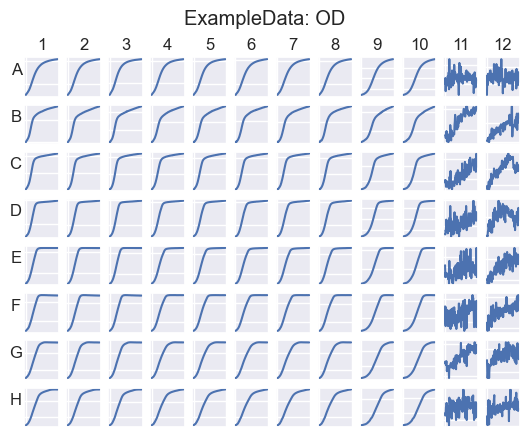

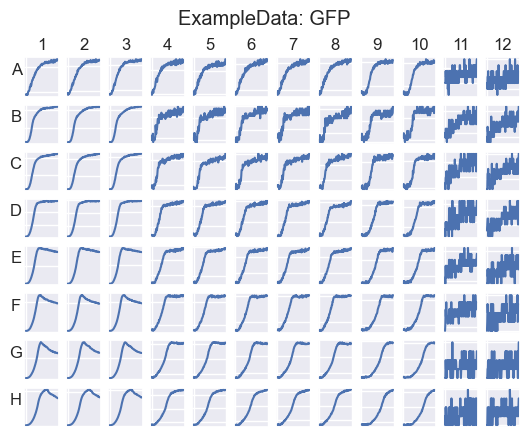

In [9]:
p.plot(y= 'OD', plate= True)
p.plot(y= 'GFP', plate= True)

A dataframe is created too for the contents of the wells:

<a id="checkingthecontentsofthewells"></a>
## Checking the contents of wells

You can search the <tt>p.wellsdf</tt> dataframe for <tt>experiments</tt>, <tt>conditions</tt>, and <tt>strains</tt> and for wells:

In [10]:
p.showwells(strains= 'Mal12:GFP', conditions= '1% Mal')


 experiment condition    strain well
ExampleData    1% Mal Mal12:GFP   D1
ExampleData    1% Mal Mal12:GFP   D2
ExampleData    1% Mal Mal12:GFP   D3



In [11]:
p.contentsofwells(['A1', 'D1'])


A1
--
 experiment condition    strain
ExampleData    2% Raf Mal12:GFP

D1
--
 experiment condition    strain
ExampleData    1% Mal Mal12:GFP


With <tt>showwells</tt>, you can more easily see which strains are in which conditions for each experiment by setting <tt>concise =True</tt>:

In [12]:
p.showwells(concise= True, strainincludes= 'GFP', 
            sortby= 'strain')


 experiment condition                  strain  replicates
ExampleData 0.25% Mal               Mal12:GFP           3
ExampleData  0.5% Mal               Mal12:GFP           3
ExampleData    1% Mal               Mal12:GFP           3
ExampleData  1.5% Mal               Mal12:GFP           3
ExampleData    2% Mal               Mal12:GFP           3
ExampleData    2% Raf               Mal12:GFP           3
ExampleData    3% Mal               Mal12:GFP           3
ExampleData    4% Mal               Mal12:GFP           3
ExampleData 0.25% Mal Mal12:mCherry,Gal10:GFP           3
ExampleData  0.5% Mal Mal12:mCherry,Gal10:GFP           3
ExampleData    1% Mal Mal12:mCherry,Gal10:GFP           3
ExampleData  1.5% Mal Mal12:mCherry,Gal10:GFP           3
ExampleData    2% Mal Mal12:mCherry,Gal10:GFP           3
ExampleData    2% Raf Mal12:mCherry,Gal10:GFP           3
ExampleData    3% Mal Mal12:mCherry,Gal10:GFP           3
ExampleData    4% Mal Mal12:mCherry,Gal10:GFP           3



<a id="ignoringwells"></a>
## Ignoring wells 

Wells that have substantial measurement error can be ignored. For example:

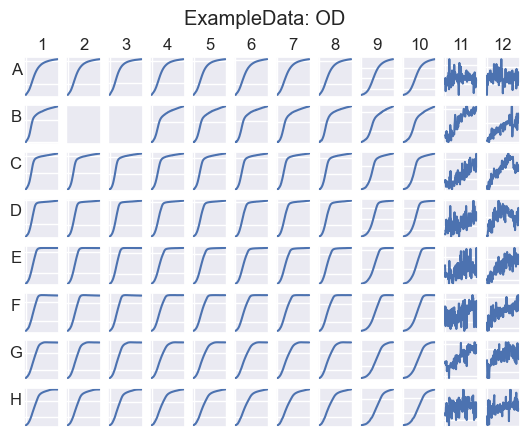

In [13]:
p.ignorewells(['B2', 'B3'])
p.plot(y= 'OD', plate= True)

<a id='correcting'><a/>

<a id= "correctingfornonlinearities"></a>
## Analysing OD data: correcting for non-linearities and for the media ##

### Correcting OD ###
Typically plate readers have a non-linear relationship between OD and cell number for sufficiently large ODs. 

You can use your own calibration data or <tt>omniplate</tt>'s default calibration data to correct for this non-linearity. 

The background OD of control wells with only media, marked with a "Null" strain, is first subtracted.

Fitting dilution data for OD correction for non-linearities.
Using default data.


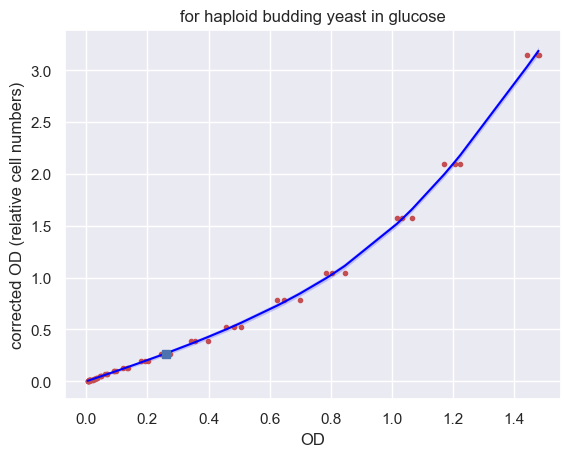


Corrected for the background OD of the media.
ExampleData: Correcting OD for 0.25% Mal for media.


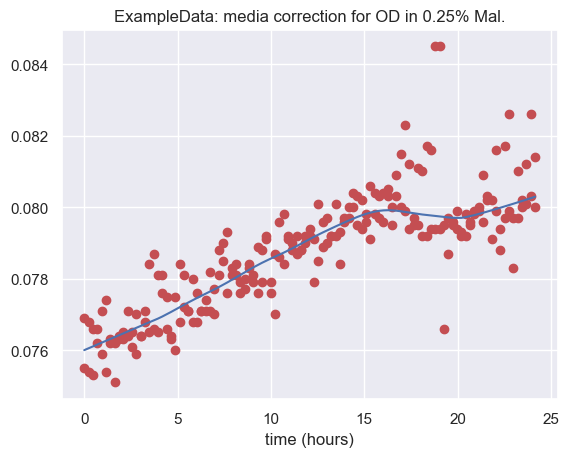

Corrected for the background OD of the media.
ExampleData: Correcting OD for 0.5% Mal for media.


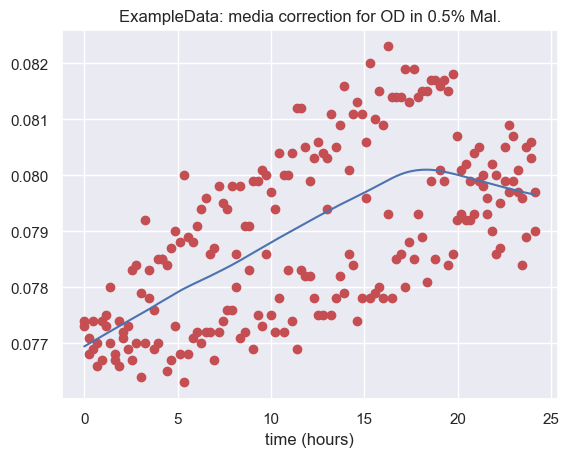

Corrected for the background OD of the media.
ExampleData: Correcting OD for 1% Mal for media.


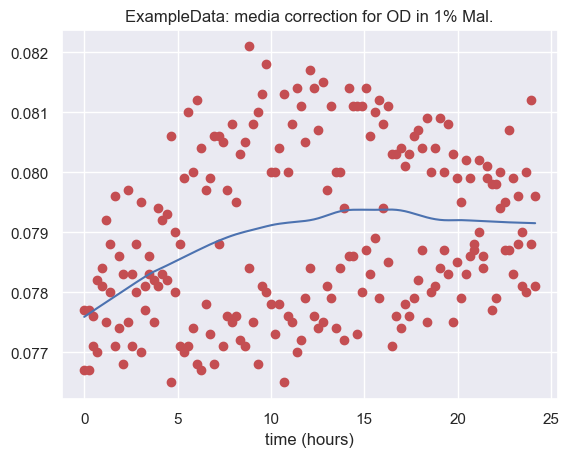

Corrected for the background OD of the media.
ExampleData: Correcting OD for 1.5% Mal for media.


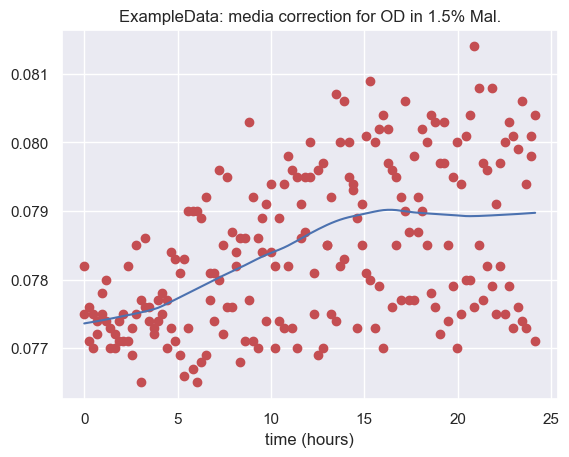

Corrected for the background OD of the media.
ExampleData: Correcting OD for 2% Mal for media.


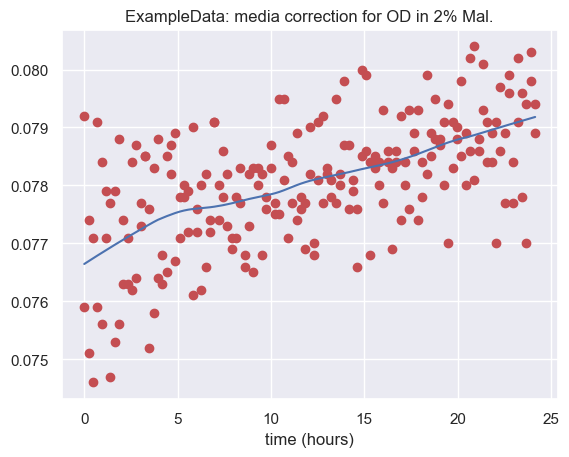

Corrected for the background OD of the media.
ExampleData: Correcting OD for 2% Raf for media.


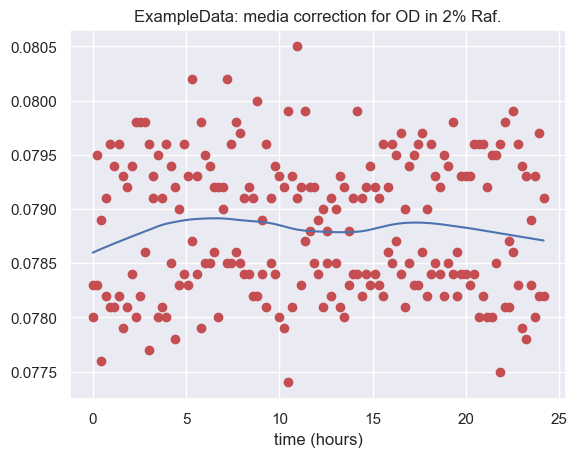

Corrected for the background OD of the media.
ExampleData: Correcting OD for 3% Mal for media.


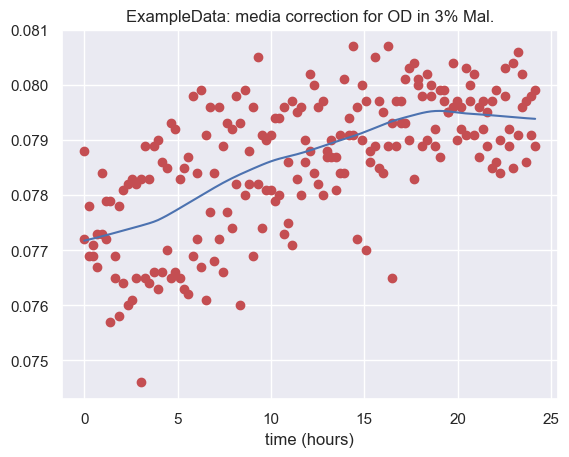

Corrected for the background OD of the media.
ExampleData: Correcting OD for 4% Mal for media.


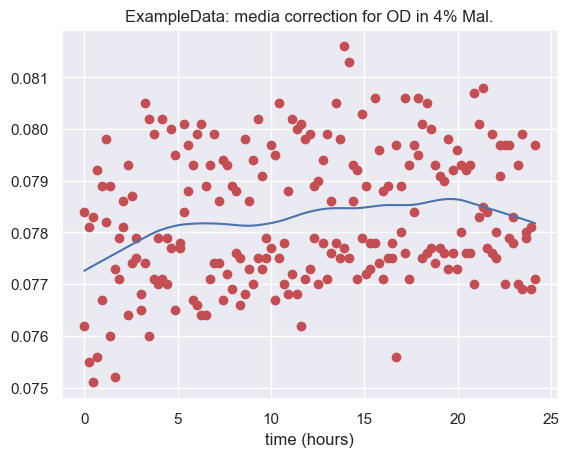

In [14]:
p.correctOD()

The function used for this correction is plotted unless <tt>figs= False</tt>. Note that the corrected values (the relative cell density) are in arbitrary units.

You can change the calibration data used:

~~~python
p.correctOD(ODfname= 'ODcorrection_Raffinose_Haploid.txt')
~~~

<a id="plotting"></a>
## Analysing OD data: plotting

All plotting uses Seaborn's <tt>relplot</tt> function, and you can set most of the [variables that Seaborn allows](https://seaborn.pydata.org/generated/seaborn.relplot.html). 

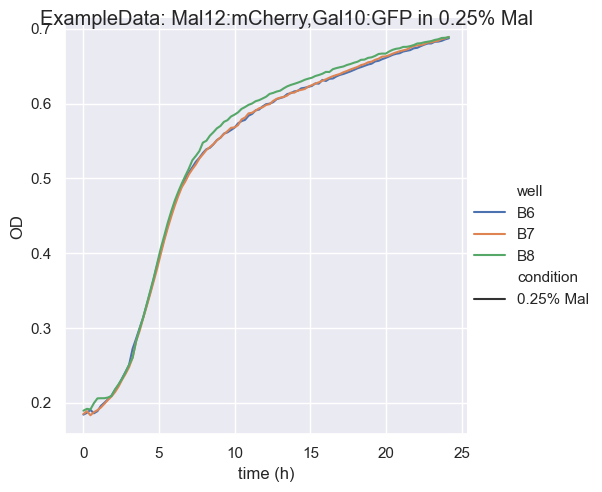

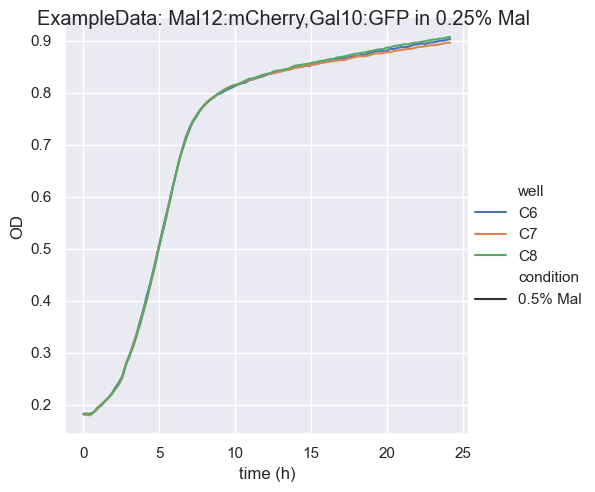

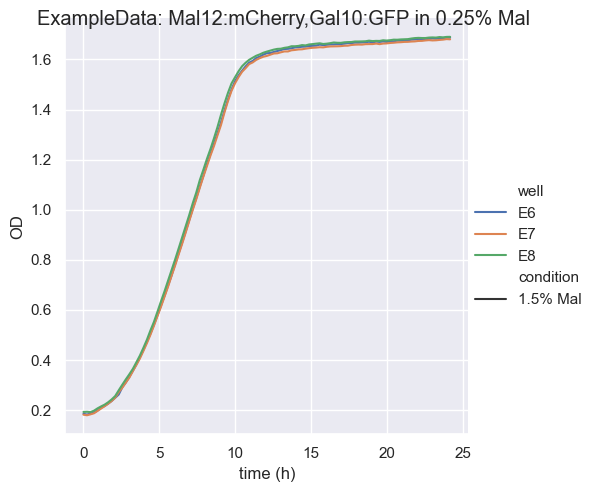

In [15]:
p.plot(y= 'OD', wells= True, strainincludes= 'Gal10:GFP', 
       conditionincludes= '5', prettify_dict={"time" : "time (h)"})

If you do not plot individual wells, errors are shown by shading using the standard deviation over all relevant wells.

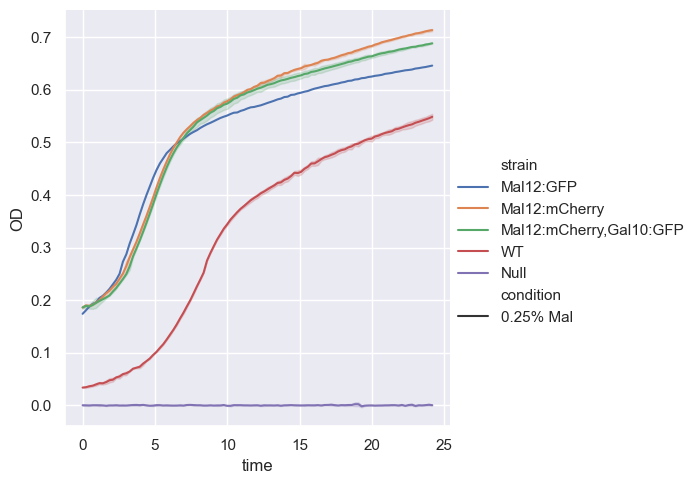

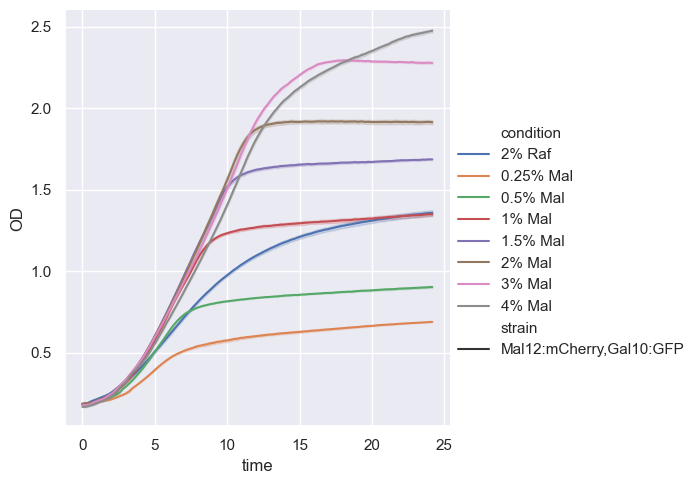

In [16]:
p.plot(y= 'OD', conditionincludes= '0.25')
p.plot(y= 'OD', strainincludes= 'Gal10:GFP', 
       hue= 'condition', style= 'strain')

You can also use <tt>seaborn</tt> directly:

<a id="estimating"></a>

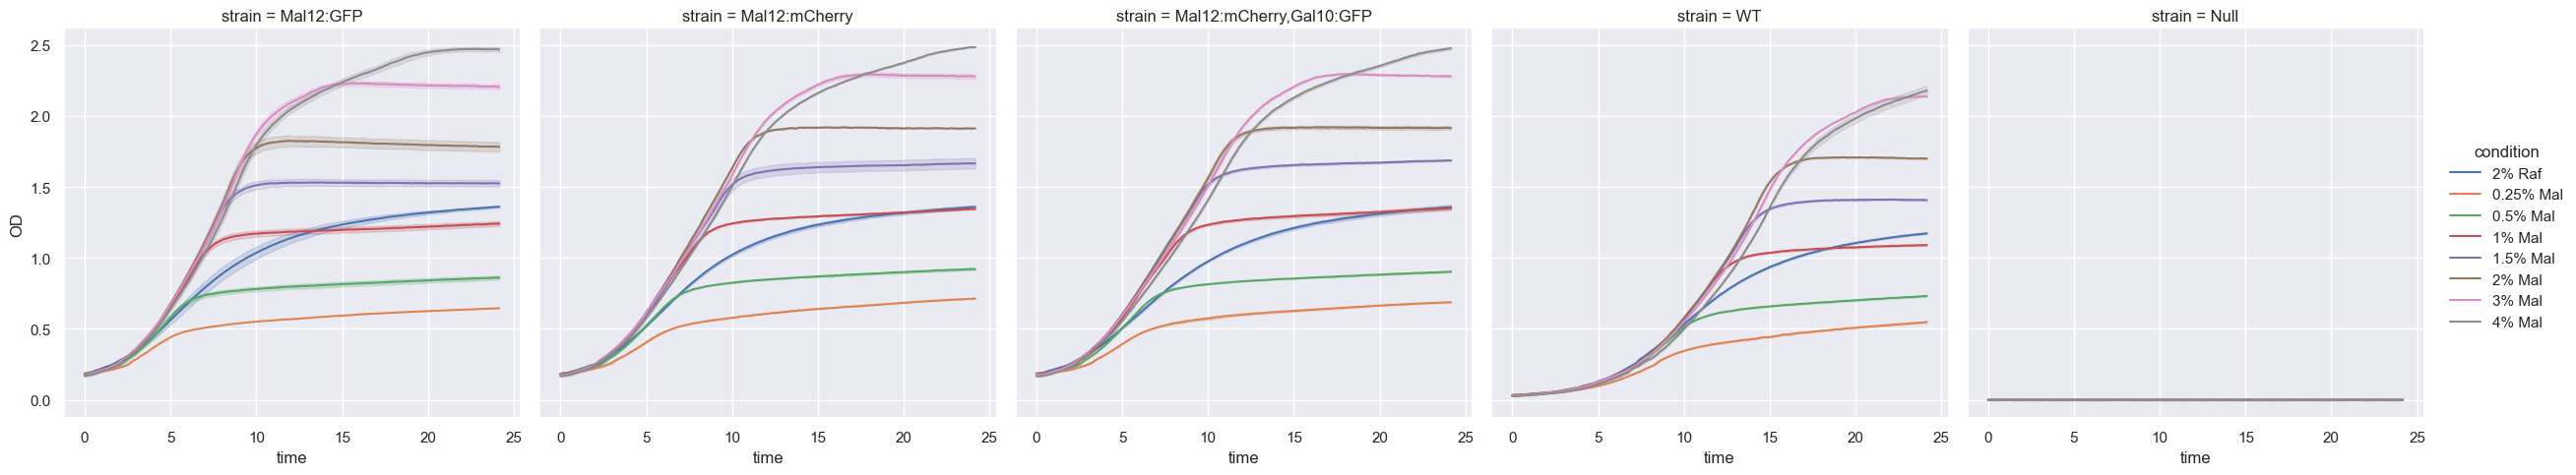

In [17]:
fg= sns.relplot(x= "time", y= "OD", data= p.r, kind= "line", 
                hue= "condition", col= "strain", errorbar="sd")

<a id="estimatinggrowthrates"></a>
## Analysing OD data: estimating growth rates

You can estimate (specific) growth rates using all replicates for each strain in each condition using <a href="http://swainlab.bio.ed.ac.uk/papers/ncomm16.pdf" target="_blank">a Gaussian process-based algorithm</a>. 

If the maximum growth rate is a local maximum, it is marked with a yellow circle. 

Local maxima are identified by the prominence of the local peaks. If the peak is falsely identified, you can custom how the local maxima are detected by specifying the degree of prominence with the <tt>peakprominence</tt> parameter, which has a default value of <tt>0.05</tt>.

If you would prefer not to have local maximum growth rates shown on the plots, set <tt>plotlocalmax= False</tt>. 

Fitting log_OD for ExampleData: Mal12:GFP in 0.25% Mal
Taking natural logarithm of the data.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.176534e+02
hparam[0]= 3.313482e+02 [1.000000e-05, 1.000000e+05]
hparam[1]= 6.364832e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-02 [1.000000e-02, 1.000000e+00]


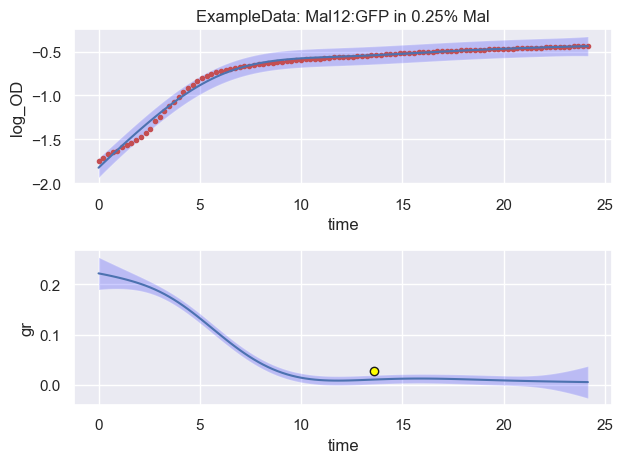

---


In [18]:
p.getstats(strains="Mal12:GFP", conditionincludes= "0.25")

Three hyperparameters are estimated during the fitting, and you can change the lower and upper bounds for these hyperparameters. The bounds are specifed in log10 space. 

For example, to change the bounds on the measurement noise (parameter 2) to $10^{-2}$ and $10^{0}$ use:

Fitting log_OD for ExampleData: Mal12:GFP in 0.25% Mal
Taking natural logarithm of the data.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.264102e+02
hparam[0]= 8.314498e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.091971e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-03 [1.000000e-03, 1.000000e+00]


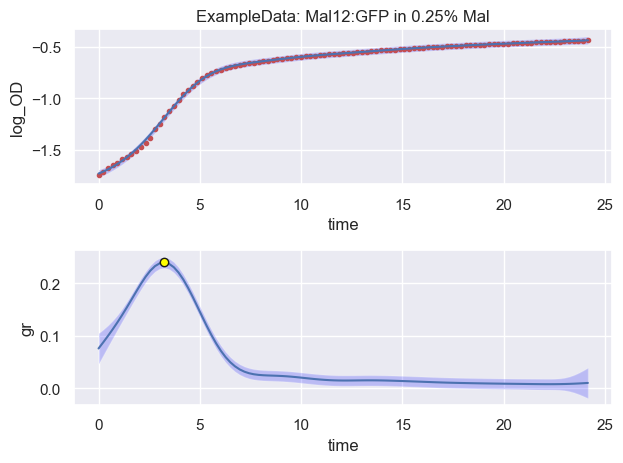

---


In [19]:
p.getstats(strains="Mal12:GFP", conditionincludes= "0.25", 
           bd= {2: (-3,0)})

You can specify the bounds on multiple parameters, such as parameters 0 and 1, using

~~~python
p.getstats(strainincludes="Mal12:GFP", conditionincludes= "0.25", 
    bd= {0: (-2, 2), 1: (-4, -1)})
~~~

Running

~~~python
p.getstats()
~~~

will fit all strains in all conditions.

Growth statistics are saved for the strains processed in <tt>p.sc</tt>.

For example, the maximum growth rate and its error are given by:

In [20]:
p.sc[["experiment", "condition", "strain", "max_gr", "max_gr_err"]].head()

experiment  condition     strain    max_gr  max_gr_err
0  ExampleData  0.25% Mal  Mal12:GFP  0.241737    0.006643
1  ExampleData   0.5% Mal  Mal12:GFP       NaN         NaN
2  ExampleData     1% Mal  Mal12:GFP       NaN         NaN
3  ExampleData   1.5% Mal  Mal12:GFP       NaN         NaN
4  ExampleData     2% Mal  Mal12:GFP       NaN         NaN

We can get the growth rate for all strains too:

In [21]:
p.getstats(figs=False)

Fitting log_OD for ExampleData: Mal12:GFP in 0.25% Mal
Taking natural logarithm of the data.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.127374e+02
hparam[0]= 6.990379e+04 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.098628e+02 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-02 [1.000000e-02, 1.000000e+00]
---
Fitting log_OD for ExampleData: Mal12:mCherry in 0.25% Mal
Taking natural logarithm of the data.
GP Warning: input data is not sorted. Sorting.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.572912e+02
hparam[0]= 5.487916e+02 [1.000000e-05, 1.000000e+05]
hparam[1]= 6.222720e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-02 

<a id="autoGFP"></a>

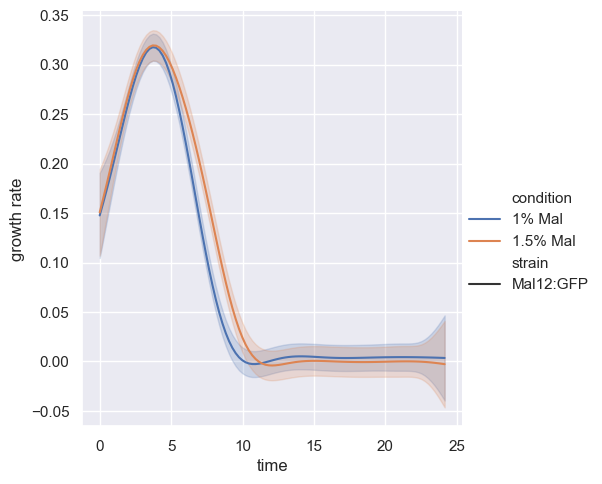

In [22]:
p.plot(y= "gr", strains="Mal12:GFP", conditionincludes= "1", 
       hue= "condition", style="strain", 
       prettify_dict= {"gr" : "growth rate"})

<a id="improvinggetstats"></a>
## Speeding up and trouble shooting for estimating growth rates 

The optimisation routine that fits the hyperparameters of the Gaussian process to OD data can be customised by changing options to <tt>getstats</tt>. 

As well as changing the bounds on the hyperparameters with <tt>bd</tt>, useful options are:

- <tt>cvfn</tt> : Determines the covariance function of the Gaussian process – either <tt>matern</tt> (default), <tt>sqexp</tt> (squared exponential), or <tt>nn</tt> (neural network). 
- <tt>noruns</tt> : Determines the number of fitting attempts with each having a randomly chosen initial guess for the hyperparameters (default is 5).
- <tt>exitearly</tt> : If True (default), stops fitting once a fit is found rather than perform all <tt>noruns</tt> fits and take the best.
- <tt>noinits</tt> : Determines the number of attempts to find a good initial guess for the hyperparameters before running the fitting (default is 100).
- <tt>nosamples</tt> : The number of samples used to determine the statistics once a fit has been found (default is 100).
- <tt>iskip</tt> : To speed up the fitting for large datasets by ignoring data points and so reducing the size of the dataset. For example, <tt>iskip= 2</tt> means that only every second data point is used.
- <tt>findareas</tt> : If False (default), the areas under the OD versus time and the growth rate versus time will not be calculated. Estimating the errors in these quantities is slow. 

You can see the quality of the fit using

~~~python
p.sc[['experiment', 'condition', 'strain', 'OD logmaxlike']]
~~~

where larger <tt>logmaxlike</tt> is better. 

The bounds on hyperparameter 2 is a measure of how noisy you think your measurements are. Occasionally with the default bounds, we find that the growth rate fluctuates in small waves over time or has two peaks separated by a shallow trough. This behaviour is often because the software is fitting the noise in the data. Changing the bounds on hyperparameter 2, particularly increasing the lower bound so that the minimal level of noise is higher, usually stops these fluctuations so that the growth rate varies smoothly.

<a id="localmaxgr"></a>
## Finding the local maximum growth rate 

Scipy's <tt>find_peaks</tt> is used to find the local maximum growth rate, which is useful if the highest growth rate is at <tt>t= 0</tt>.

You can specify properties that a peak must satisfy to be considered a maximum using the options of <tt>find_peaks</tt>.

First, try

~~~python
p.getstats(showpeakproperties= True, width= 0, 
           prominence= 0)
~~~

which will display the width and prominence of the local peaks to get an idea of the values to set. These values are given in the number of <tt>x</tt> and <tt>y</tt> points and not in real units.

Once you have a minimum value of one of these parameters that a true local maximum should satisfy then use, for example,

~~~python
p.getstats(width= 15)
~~~

so that all local maxima will have a width of at least 15 <tt>x</tt> units.

Note that these arguments for <tt>find_peaks</tt> must go at the end of your call to <tt>getstats</tt>.

<a id="gfp"></a>
## Correcting autofluorescence: GFP

GFP is usually corrected for autofluorescence using the <a href="http://swainlab.bio.ed.ac.uk/papers/bmcbiotech14.pdf" target="_blank">method of Lichten et al.</a>, which requires measurement of fluorescence of a reference strain both at the GFP wavelength and at a higher wavelength (called <tt>AutoFL</tt>). 

We run <tt>correctauto</tt> to correct for autofluorescence. 

By setting <tt>useGPs</tt> to <tt>True</tt> or <tt>False</tt>, you can specify whether you would like to use Gaussian processes to estimate errors in the corrected fluorescence, which is the default method, or whether you would prefer to use the standard deviation over replicate wells, which will be faster but requires sufficent wells.

In [23]:
p.correctauto(["GFP", "AutoFL"], strains="Mal12:GFP", conditionincludes="1", 
              refstrain= "WT", options= {"figs" :False})


Correcting autofluorescence using WT as the reference.
Using two fluorescence wavelengths.
Correcting autofluorescence using GFP and AutoFL.
Correcting for background fluorescence of media.
ExampleData: Processing reference strain WT for GFP in 1% Mal.
Fitting log_GFP for ExampleData: Mal12:GFP in 1% Mal
Taking natural logarithm of the data.
GP Warning: input data is not sorted. Sorting.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.680287e+02
hparam[0]= 6.683813e+04 [1.000000e-05, 1.000000e+05]
hparam[1]= 3.041178e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-02 [1.000000e-02, 1.000000e+00]
---
Correcting for background fluorescence of media.
ExampleData: Processing reference strain WT for GFP in 1.5% Mal.
Fitting log_GFP for ExampleData: Mal12:GFP in 1.5% Mal
Taking natural logarithm of the data.
GP 

The results are stored in the <tt>p.s</tt> dataframe and can be plot by specifying <tt>cGFPperODd</tt>. The corrected fluorescence for the wild-type strain, which should be zero, gives an indication of the size of the errors.

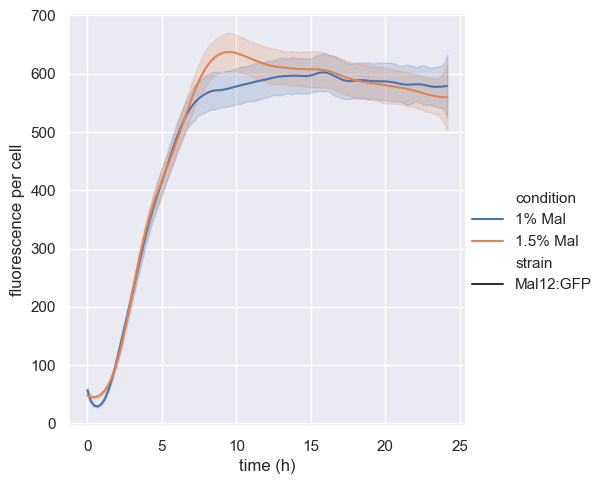

In [24]:
p.plot(y= "cGFPperOD", strains="Mal12:GFP", conditionincludes="1",
       hue= "condition", style="strain",
      prettify_dict={"cGFPperOD" : "fluorescence per cell", "time" : "time (h)"})

<a id="automCh"><a/>

<a id="mcherry"></a>
## Correcting autofluorescence: mCherry

mCherry is corrected for autofluorescence by using the fluorescence of a reference strain at the same OD as the strain of interest.

The code for correcting autofluorescence in this case also accounts for the fluorescence of the media, and the results should be the same whether or not the media is corrected. 

You can again specify whether or not <tt>omniplate</tt> should use Gaussian processes.


Correcting autofluorescence using WT as the reference.
Using one fluorescence wavelength.
Correcting autofluorescence using mCherry.
ExampleData: Processing reference strain WT for mCherry in 1% Mal.


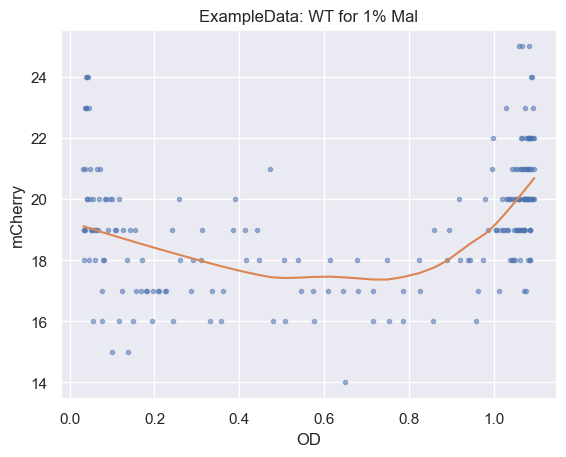

ExampleData: Processing reference strain WT for mCherry in 1.5% Mal.


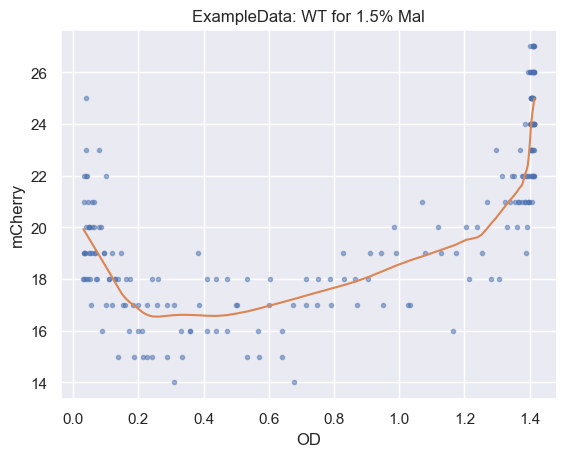

In [25]:
p.correctauto("mCherry", conditionincludes= "1",  strainincludes= "mCherry",
              refstrain= "WT", options = {"useGPs" : False})

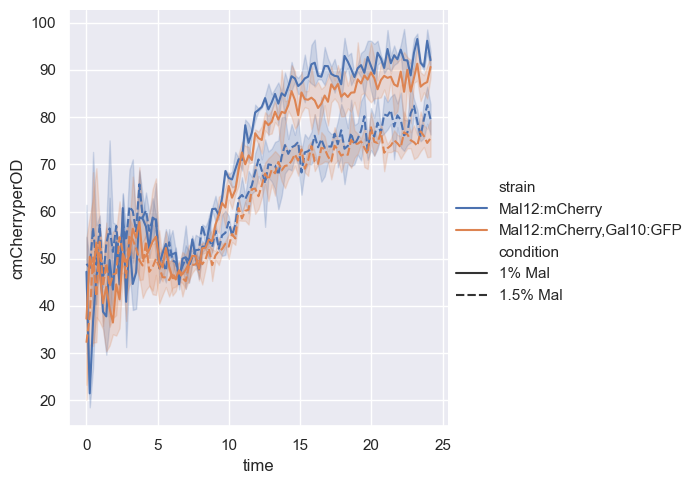

In [26]:
p.plot(y= "cmCherryperOD", conditionincludes="1", strainincludes= "mCherry",
       hue= "strain", style= "condition", nonull= True)

<a id="estimatingthetimederiv"></a>
## Estimating the time-derivative of the fluorescence

You can also estimate the derivative of, for example, the fluorescence per cell. Here <tt>logs= False</tt> because we want the derivative of the fluorescence and not the derivative of the logarithm of the fluorescence:

Fitting cmCherryperOD for ExampleData: Mal12:mCherry in 1% Mal
GP Warning: input data is not sorted. Sorting.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= -2.313996e+03
hparam[0]= 3.143661e+03 [1.000000e-05, 1.000000e+05]
hparam[1]= 7.750484e-01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e+00 [1.000000e-02, 1.000000e+00]


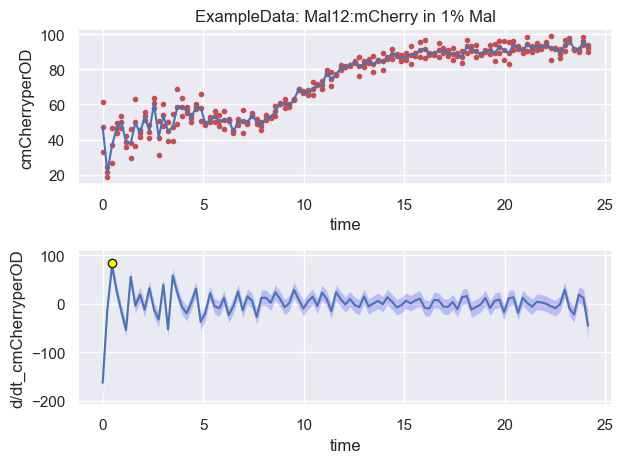

---


In [27]:
p.getstats('cmCherryperOD', conditions= ['1% Mal'], 
           strains= ['Mal12:mCherry'], logs= False,
          noruns= 5, exitearly= False)

The results are stored in the <tt>p.s</tt> and <tt>p.sc</tt> dataframes:

In [28]:
p.s.query('condition == "1% Mal" and strain == "Mal12:mCherry"')[['time', 
                                                                  'd/dt_cmCherryperOD']].head()

time  d/dt_cmCherryperOD
1155  0.000000         -162.828702
1156  0.232306          -10.712759
1157  0.464583           78.623955
1158  0.696840           25.566560
1159  0.929111          -15.649743

<a id="midlog"></a>
## Quantifying the behaviour during mid-log growth

Using <tt>nunchaku</tt> (Huo & Swain), <tt>omniplate</tt> will automatically identify the segment of the time series where growth is exponential and calculate statistics of all variables in the <tt>s</tt> dataframe in this mid-log segment.

Black squares mark the segment of growth identified as mid-log.


Finding mid-log growth for ExampleData : Mal12:GFP in 1% Mal


getting evidence matrix:   0%|          | 0/103 [00:00<?, ?it/s]

getting model evidence:   0%|          | 0/4 [00:00<?, ?it/s]

getting internal boundaries:   0%|          | 0/3 [00:00<?, ?it/s]

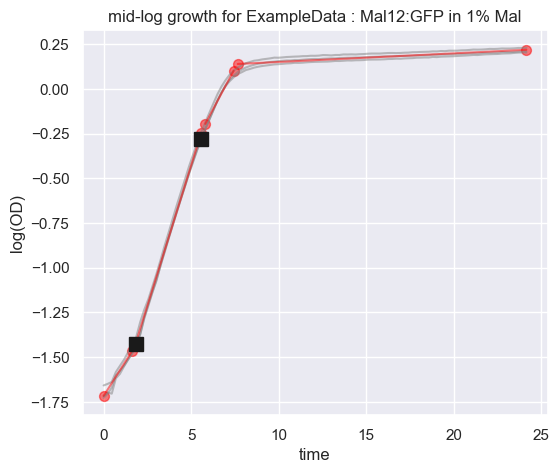


Finding mid-log growth for ExampleData : Mal12:mCherry in 1% Mal


getting evidence matrix:   0%|          | 0/103 [00:00<?, ?it/s]

getting model evidence:   0%|          | 0/4 [00:00<?, ?it/s]

getting internal boundaries:   0%|          | 0/3 [00:00<?, ?it/s]

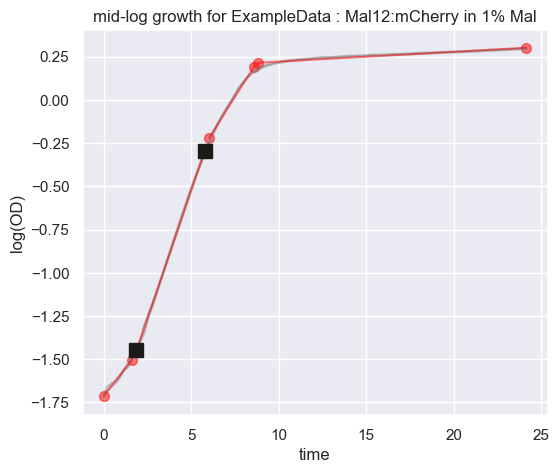


Finding mid-log growth for ExampleData : Mal12:mCherry,Gal10:GFP in 1% Mal


getting evidence matrix:   0%|          | 0/103 [00:00<?, ?it/s]

getting model evidence:   0%|          | 0/4 [00:00<?, ?it/s]

getting internal boundaries:   0%|          | 0/3 [00:00<?, ?it/s]

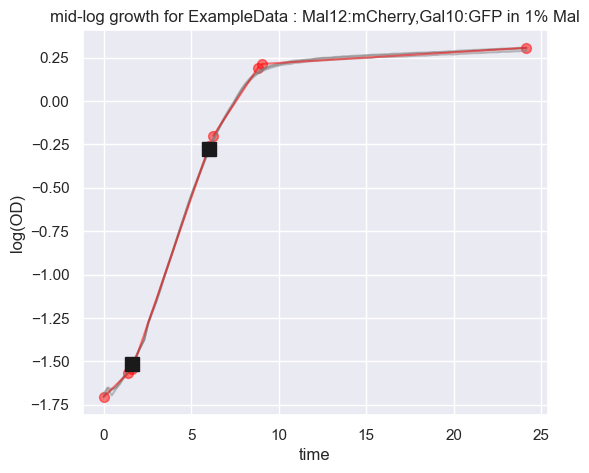


Finding mid-log growth for ExampleData : WT in 1% Mal


getting evidence matrix:   0%|          | 0/103 [00:00<?, ?it/s]

getting model evidence:   0%|          | 0/4 [00:00<?, ?it/s]

getting internal boundaries:   0%|          | 0/3 [00:00<?, ?it/s]

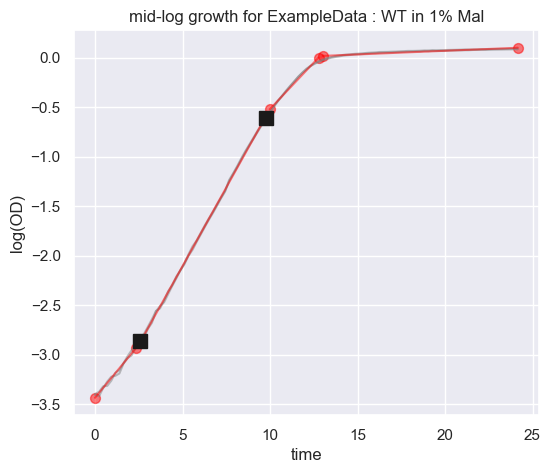

In [29]:
p.getmidlog(conditions="1% Mal")

All mid-log statistics are stored in the <tt>sc</tt> dataframe.

In [30]:
p.sc[p.sc.condition=="1% Mal"][["strain", "condition"] + [col for col in p.sc.columns if "midlog" in col]]

strain condition  mean_midlog_time  mean_midlog_OD_mean  \
2                 Mal12:GFP    1% Mal          3.716350             0.464280   
10            Mal12:mCherry    1% Mal          3.832485             0.446235   
18  Mal12:mCherry,Gal10:GFP    1% Mal          3.832487             0.437583   
26                     Null    1% Mal               NaN                  NaN   
34                       WT    1% Mal          6.155182             0.219199   

    mean_midlog_GFP_mean  mean_midlog_AutoFL_mean  mean_midlog_mCherry_mean  \
2             181.901961                31.607843                 16.705882   
10             47.222222                22.277778                 41.138889   
18             42.283333                20.250000                 39.616667   
26                   NaN                      NaN                       NaN   
34             46.921875                21.718750                 18.031250   

    mean_midlog_OD_err  mean_midlog_GFP_err  mean_midlog_AutoFL_err  ...  \
2             0.010335             2.660401                0.364480  ...   
10            0.005545             0.549972                0.549972  ...   
18            0.001970             0.596410                0.404145  ...   
26                 NaN                  NaN                     NaN  ...   
34            0.002002             0.596621                0.441942  ...   

    max_midlog_cmCherry  max_midlog_cmCherry_err  max_midlog_cmCherryperOD  \
2                   NaN                      NaN                       NaN   
10            37.631452                 3.997314                 60.727851   
18            35.250934                 5.714481                 57.800836   
26                  NaN                      NaN                       NaN   
34                  NaN                      NaN                       NaN   

    max_midlog_cmCherryperOD_err  max_midlog_smoothed_cmCherryperOD  \
2                            NaN                                NaN   
10                      8.218721                          60.231065   
18                     10.083628                                NaN   
26                           NaN                                NaN   
34                           NaN                                NaN   

    max_midlog_smoothed_cmCherryperOD_err  max_midlog_d/dt_cmCherryperOD  \
2                                     NaN                            NaN   
10                               1.152168                      58.210006   
18                                    NaN                            NaN   
26                                    NaN                            NaN   
34                                    NaN                            NaN   

    max_midlog_d/dt_cmCherryperOD_err  max_midlog_d/dt_d/dt_cmCherryperOD  \
2                                 NaN                                 NaN   
10                          16.501006                         1249.763657   
18                                NaN                                 NaN   
26                                NaN                                 NaN   
34                                NaN                                 NaN   

    max_midlog_d/dt_d/dt_cmCherryperOD_err  
2                                      NaN  
10                               243.35046  
18                                     NaN  
26                                     NaN  
34                                     NaN  

[5 rows x 142 columns]

You can display the results with <tt>plot</tt>.

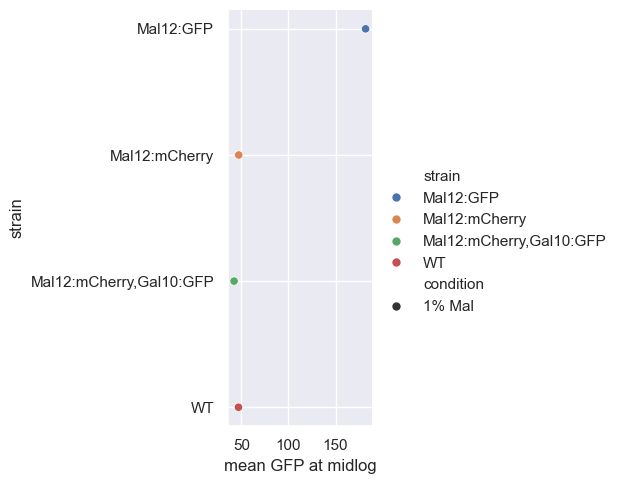

In [31]:
p.plot(x="mean_midlog_GFP_mean", y="strain", 
       prettify_dict={"mean_midlog_GFP_mean" : "mean GFP at midlog"})

<a id="savingfigures"></a>
## Saving figures

You can at any time save all figures that are currently displayed (but not those displayed inline in Jupyter):

~~~python
p.savefigs()
~~~

which saves each figure as a separate page in a single PDF file in the working directory.

<a id="extractingnumerical"></a>
## Extracting numerical values from a column

It may be useful to extract the numerical values given in, for example, the name of an experiment or condition. Calling

~~~python
p.addnumericcolumn('new column name', 'original column')
~~~

extracts any numbers from each entry in the original column, makes a new column in all the dataframes called <tt>'new column name'</tt>, and places these numbers in the appropriate entry in this new column.

For example:

In [32]:
p.addnumericcolumn('concentration', 'condition')
p.sc[['condition', 'strain', 'concentration']].head()

condition     strain  concentration
0  0.25% Mal  Mal12:GFP           0.25
1   0.5% Mal  Mal12:GFP           0.50
2     1% Mal  Mal12:GFP           1.00
3   1.5% Mal  Mal12:GFP           1.50
4     2% Mal  Mal12:GFP           2.00

It is also possible to specify which number in the column entry you would like using <tt>picknumber</tt> and you can find numbers next to a substring of interest using <tt>leftsplitstring</tt> and <tt>rightsplitstring</tt>.

<a id="subdf"></a>
## Getting a smaller dataframe for plotting directly

You can get a subset of the data as a dataframe, from either the <tt>r</tt> (the raw time-series), <tt>s</tt> (the processed time-series), or <tt>sc</tt> (the summary statistics) dataframes,  using, for example:

In [33]:
subdf= p.getdataframe('s', conditionincludes= 'Raf', strainincludes= 'Gal')
subdf.head()

experiment condition                   strain      time   OD_mean  \
2835  ExampleData    2% Raf  Mal12:mCherry,Gal10:GFP  0.000000  0.176736   
2836  ExampleData    2% Raf  Mal12:mCherry,Gal10:GFP  0.232306  0.183252   
2837  ExampleData    2% Raf  Mal12:mCherry,Gal10:GFP  0.464583  0.195068   
2838  ExampleData    2% Raf  Mal12:mCherry,Gal10:GFP  0.696840  0.204218   
2839  ExampleData    2% Raf  Mal12:mCherry,Gal10:GFP  0.929111  0.211668   

       GFP_mean  AutoFL_mean  mCherry_mean    OD_err  GFP_err  ...  \
2835  37.333333    17.000000     25.333333  0.003436  0.57735  ...   
2836  36.000000    17.000000     24.666667  0.006882  0.00000  ...   
2837  38.666667    18.333333     24.000000  0.004063  0.57735  ...   
2838  37.333333    17.666667     24.333333  0.004065  0.57735  ...   
2839  39.000000    18.000000     26.333333  0.003215  0.00000  ...   

      cmCherry_err  cmCherryperOD  cmCherryperOD_err  smoothed_cmCherryperOD  \
2835           NaN            NaN                NaN                     NaN   
2836           NaN            NaN                NaN                     NaN   
2837           NaN            NaN                NaN                     NaN   
2838           NaN            NaN                NaN                     NaN   
2839           NaN            NaN                NaN                     NaN   

      smoothed_cmCherryperOD_err  d/dt_cmCherryperOD  d/dt_cmCherryperOD_err  \
2835                         NaN                 NaN                     NaN   
2836                         NaN                 NaN                     NaN   
2837                         NaN                 NaN                     NaN   
2838                         NaN                 NaN                     NaN   
2839                         NaN                 NaN                     NaN   

      d/dt_d/dt_cmCherryperOD  d/dt_d/dt_cmCherryperOD_err  concentration  
2835                      NaN                          NaN            2.0  
2836                      NaN                          NaN            2.0  
2837                      NaN                          NaN            2.0  
2838                      NaN                          NaN            2.0  
2839                      NaN                          NaN            2.0  

[5 rows x 39 columns]

<a id="exportingandimporting"></a>
## Exporting and importing the dataframes

The three dataframes
~~~python
p.r
p.s
p.sc
~~~
can all be saved as <tt>tsv</tt> (or <tt>json</tt> or <tt>csv</tt>) files. A logfile of the commands that you've used will also be saved.

In [34]:
p.exportdf()

Exported successfully.


The files can be imported similarly:

In [35]:
q= om.platereader(datadir= 'data', ls= False)
q.importdf('ExampleData')

Imported ExampleData_r.tsv
Imported ExampleData_s.tsv
Imported ExampleData_sc.tsv


Experiment: ExampleData 
---
Conditions:
	 0.25% Mal
	 0.5% Mal
	 1% Mal
	 1.5% Mal
	 2% Mal
	 2% Raf
	 3% Mal
	 4% Mal
Strains:
	 Mal12:GFP
	 Mal12:mCherry
	 Mal12:mCherry,Gal10:GFP
	 Null
	 WT
Data types:
	 OD
	 GFP
	 AutoFL
	 mCherry
Ignored wells:
	 None



<a id="addingnewprocesseddata"></a>
## Adding new processed data 

Here is a more complex example where we wish to plot the fluorescence at the time when the growth rate is maximum. 

We first create a new field, <tt>GFP mean at max growth rate</tt>, in the dataframe <tt>p.sc</tt>.

In [36]:
s= 'Mal12:GFP'
# store results as an array of dictionaries to eventually convert into a dataframe
results= []
for e in p.allexperiments:
    for c in p.allconditions[e]:
        # find the time of maximum growth rate for the condition
        tm= p.sc.query('experiment == @e and condition == @c and strain == @s')['time_of_max_gr'].values[0]
        # take the relevant sub-dataframe for the condition
        df= p.s.query('experiment == @e and condition == @c and strain == @s')
        # find GFP mean at time tm
        i= np.argmin(np.abs(df['time'].values - tm))
        results.append({'GFP_mean_at_max_gr' : df['GFP_mean'][df.index[i]],
                     'experiment' : e, 'condition' : c, 'strain' : s})
# convert to dataframe
rdf= pd.DataFrame(results)
# add to existing dataframe by experiment, condition, and strain
p.sc= pd.merge(p.sc, rdf, how= 'outer')

In [37]:
# check results
p.sc[['experiment', 'condition', 'strain', 'local_max_gr', 'GFP_mean_at_max_gr']].head()

experiment  condition     strain  local_max_gr  GFP_mean_at_max_gr
0  ExampleData  0.25% Mal  Mal12:GFP      0.023021           45.000000
1  ExampleData   0.5% Mal  Mal12:GFP      0.300425          121.000000
2  ExampleData     1% Mal  Mal12:GFP      0.320834          165.666667
3  ExampleData   1.5% Mal  Mal12:GFP      0.322667          168.333333
4  ExampleData     2% Mal  Mal12:GFP      0.309024          190.000000

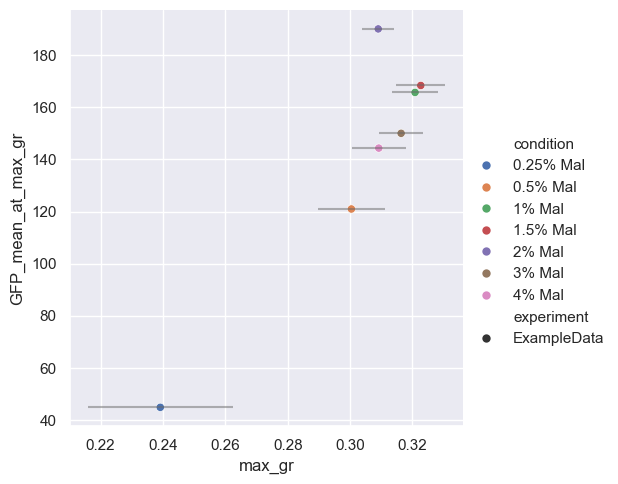

In [38]:
# plot results
p.plot(x= 'max_gr', y= 'GFP_mean_at_max_gr', hue= 'condition', 
       style= 'experiment', conditionincludes= 'Mal')

<a id="loadingandprocessingmorethanone"></a>
## Loading and processing more than one data set

It is also possible to load more than one data set and simultaneously process the data.

In [39]:
p= om.platereader(['HxtA.xlsx', 'HxtB.xlsx'], ['HxtAContents.xlsx', 'HxtBContents.xlsx'], datadir= 'data')  

Loading HxtA.xlsx
Loading HxtB.xlsx

Experiment: HxtA 
---
Conditions:
	 0.05% Gal
	 1% Gal
	 2% Gal
	 2% Glu
Strains:
	 BY4741
	 Hxt1:GFP
	 Hxt2:GFP
	 Hxt3:GFP
	 Hxt4:GFP
	 Null
Data types:
	 OD
	 GFP_80Gain
	 AutoFL_80Gain
	 GFP_65Gain
	 AutoFL_65Gain
Ignored wells:
	 None

Experiment: HxtB 
---
Conditions:
	 0.05% Gal
	 1% Gal
	 2% Gal
	 2% Glu
Strains:
	 BY4741
	 Hxt5:GFP
	 Hxt6:GFP
	 Hxt7:GFP-L
	 Hxt7:GFP-N
	 Null
Data types:
	 OD
	 GFP_80Gain
	 AutoFL_80Gain
	 GFP_65Gain
	 AutoFL_65Gain
Ignored wells:
	 None




By default, <tt>correctOD</tt> corrects all experiments for OD, but you can specify the <tt>experiment</tt> variable to specialise:

Fitting dilution data for OD correction for non-linearities.
Using default data.


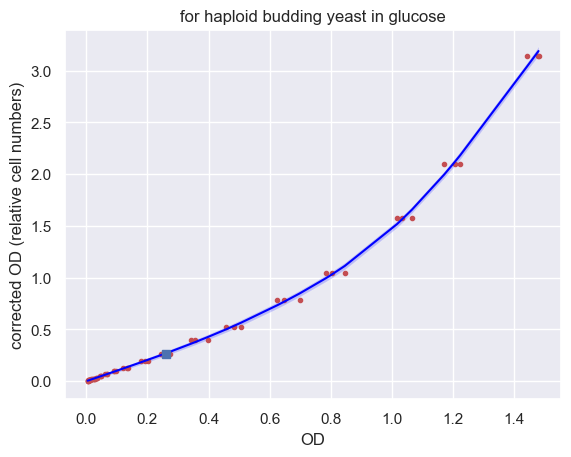


Corrected for the background OD of the media.
HxtA: Correcting OD for 0.05% Gal for media.


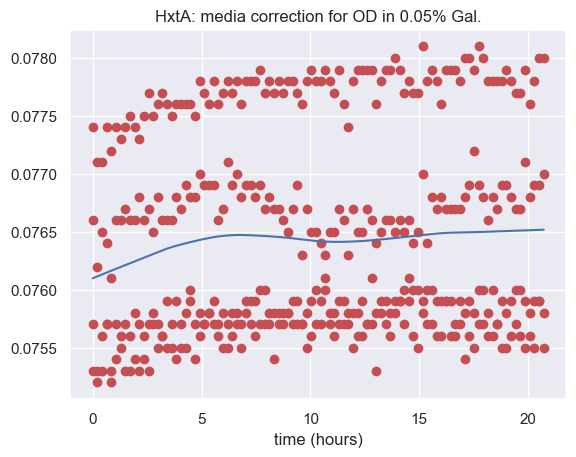

Corrected for the background OD of the media.
HxtA: Correcting OD for 1% Gal for media.


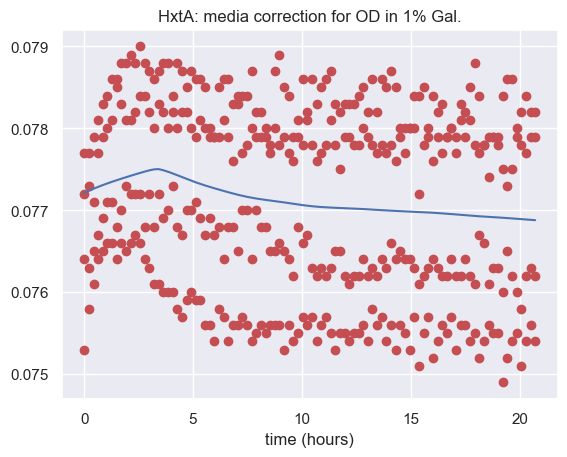

Corrected for the background OD of the media.
HxtA: Correcting OD for 2% Gal for media.


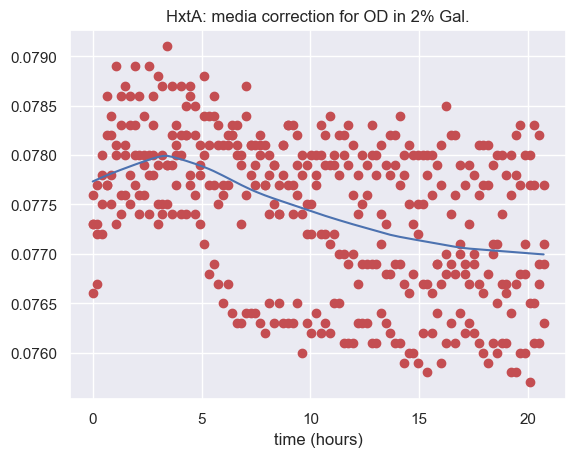

Corrected for the background OD of the media.
HxtA: Correcting OD for 2% Glu for media.


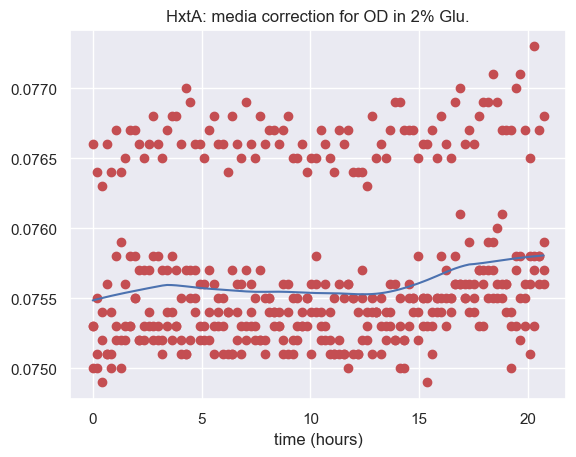

Corrected for the background OD of the media.
HxtB: Correcting OD for 0.05% Gal for media.


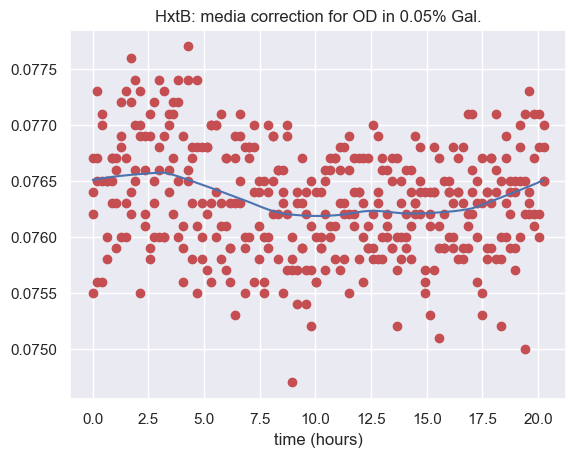

Corrected for the background OD of the media.
HxtB: Correcting OD for 1% Gal for media.


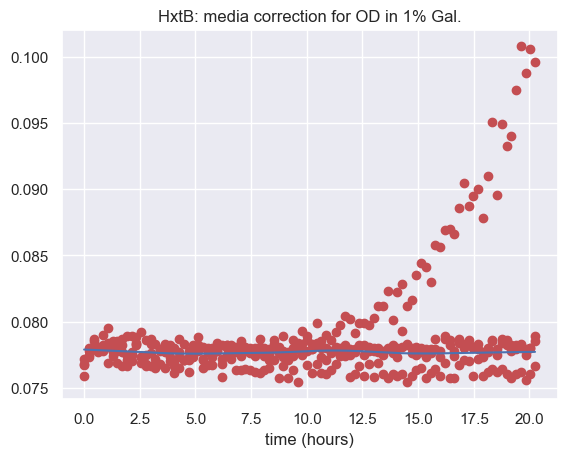

Corrected for the background OD of the media.
HxtB: Correcting OD for 2% Gal for media.


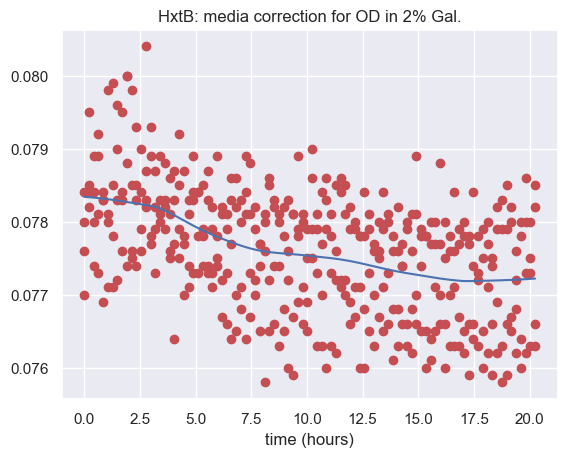

Corrected for the background OD of the media.
HxtB: Correcting OD for 2% Glu for media.


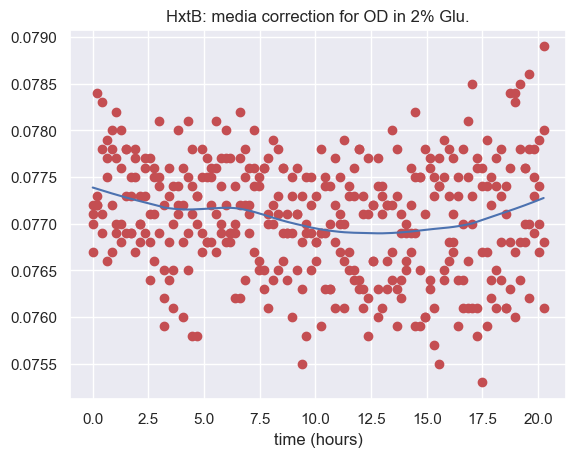

In [40]:
p.correctOD()

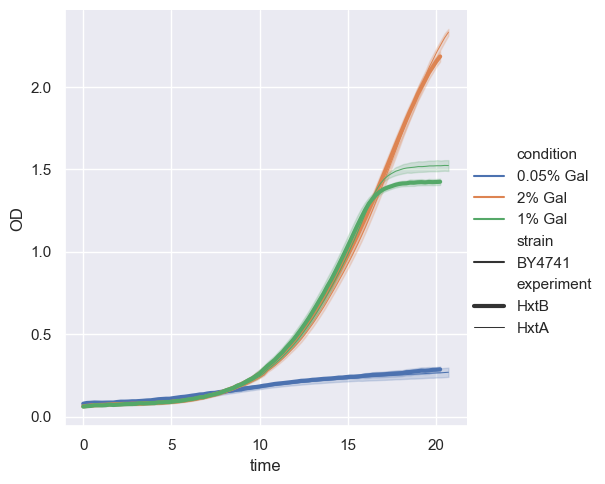

In [41]:
p.plot(y= 'OD', hue= 'condition', strains= 'BY4741', conditionincludes= 'Gal', 
       style= 'strain', size= 'experiment')

You can also run routines by experiment:

Fitting log_OD for HxtB: Hxt6:GFP in 2% Glu
Taking natural logarithm of the data.
GP Warning: input data is not sorted. Sorting.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 4.822678e+02
hparam[0]= 4.204322e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.378991e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-02 [1.000000e-02, 1.000000e+00]


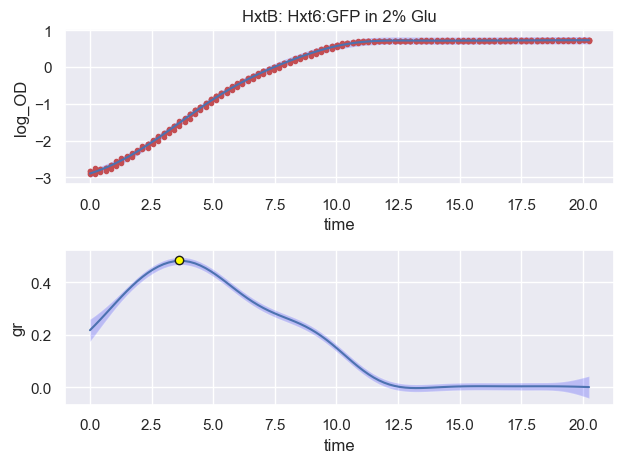

---


In [42]:
p.getstats(strainincludes= 'Hxt6', conditionincludes= 'Glu', 
           experiments= 'HxtB')  

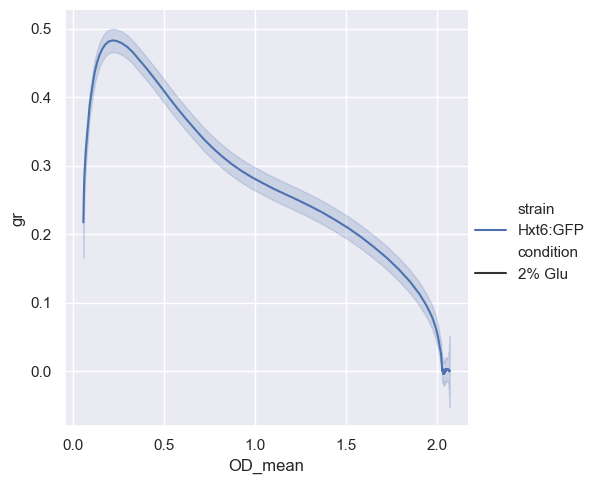

In [43]:
p.plot(x= 'OD_mean', y= 'gr', strainincludes= 'Hxt6', conditionincludes= 'Glu', 
       experiments= 'HxtB')

In [44]:
p.correctauto('GFP_65Gain', strains= ['Hxt6:GFP'], refstrain= 'BY4741',  
              conditions= '2% Glu', experiments= 'HxtB', options= {"figs" : False})    


Correcting autofluorescence using BY4741 as the reference.
Using one fluorescence wavelength.
Correcting autofluorescence using GFP_65Gain.
HxtB: Processing reference strain BY4741 for GFP_65Gain in 2% Glu.
Fitting log_GFP_65Gain for HxtB: Hxt6:GFP in 2% Glu
Taking natural logarithm of the data.
GP Warning: input data is not sorted. Sorting.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= -8.293551e+01
hparam[0]= 2.478333e+01 [1.000000e-05, 1.000000e+05]
hparam[1]= 6.403285e+00 [1.000000e-04, 1.000000e+04]
hparam[2]= 7.225516e-02 [1.000000e-02, 1.000000e+00]


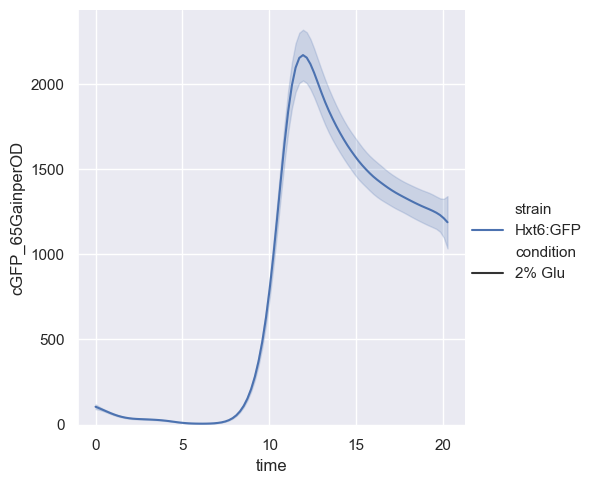

In [45]:
p.plot(y= 'cGFP_65GainperOD', strains= 'Hxt6:GFP', conditions= '2% Glu',
       experiments= 'HxtB', ylim= [-10, None], style= 'condition')   


Correcting autofluorescence using BY4741 as the reference.
Using Bayesian approach for two fluorescence wavelengths.
Correcting autofluorescence using GFP_65Gain and AutoFL_65Gain.
HxtB: Hxt6:GFP in 2% Glu


  2%|▉                                           | 2/96 [00:00<00:30,  3.03it/s]

100%|███████████████████████████████████████████| 96/96 [00:44<00:00,  2.14it/s]


Smoothing...
Fitting log_inferred_GFP_65Gain for HxtB: Hxt6:GFP in 2% Glu
Taking natural logarithm of the data.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 3.983658e+01
hparam[0]= 2.183884e+01 [1.000000e-02, 1.000000e+08]
hparam[1]= 7.607086e+00 [1.000000e-02, 1.000000e+08]
hparam[2]= 1.040098e-02 [1.000000e-02, 1.000000e+00]


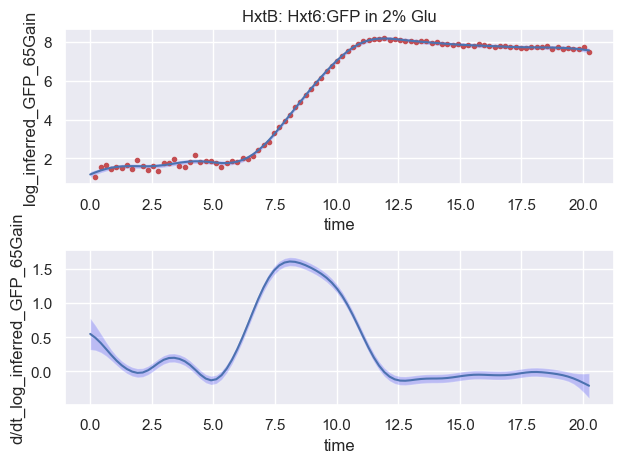

---


In [46]:
p.correctauto(['GFP_65Gain', 'AutoFL_65Gain'], strains= ['Hxt6:GFP'], refstrain= 'BY4741',  
              conditions= '2% Glu', experiments= 'HxtB', method="bayesian")    

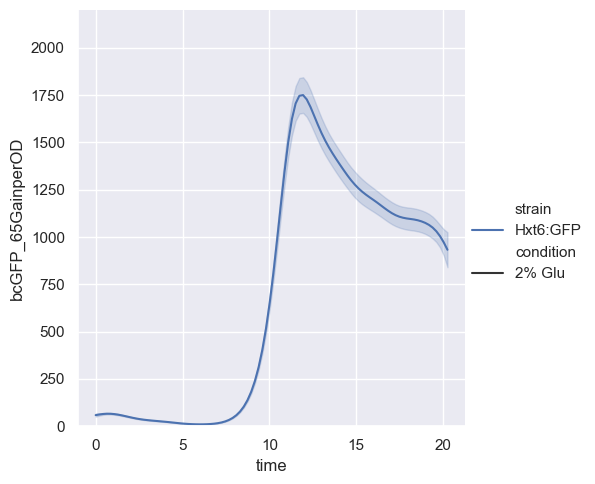

In [47]:
p.plot(y= 'bcGFP_65GainperOD', strains= 'Hxt6:GFP', conditions= '2% Glu',
       experiments= 'HxtB', style= 'condition', ylim=[0, 2200])   

<a id="renaming"></a>
### Renaming conditions and strains

When combining multiple experiments, you may wish for a more consistent or convenient convention for naming strains and conditions. 

You can replace names with alternatives using for example 
~~~python
    p.rename({'77.WT' : 'WT', '409.Hxt4' : 'Hxt4'})
~~~
to simplify strains <tt>77.WT</tt> to <tt>WT</tt> and <tt>409.Hxt4</tt> to <tt>Hxt4</tt>, and where the dictionary comprises pairs of <tt>(old name, new name)</tt>.


<a id="averagingoverexperiments"></a>
### Averaging over experiments

The plate reader often does not perfectly increment time between measurements and different experients can have slightly different time points despite the plate reader having the same settings. These unique times prevent the plotting module <tt>seaborn</tt> from taking averages.

If experiments have measurements that start at the same time point and have the same interval between measurements, then setting a <tt>commontime</tt> for all experiments will allow <tt>seaborn</tt> to perform averaging.

The <tt>commontime</tt> array runs from <tt>tmin</tt> to </tt>tmax</tt> with an interval <tt>dt</tt> between time points. These parameters are automatically calculated, but may also be specified.

Each entry in the <tt>time</tt> column in the dataframes is assigned a <tt>commontime</tt> value - the closest <tt>commontime</tt> point to that <tt>time</tt> point.

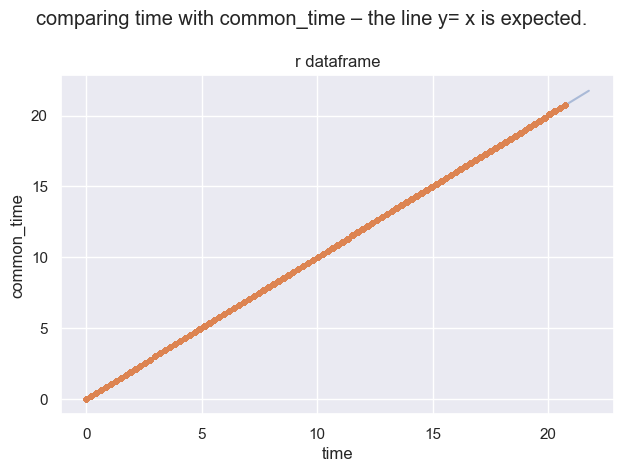

In [48]:
p.addcommonvar('time')

With <tt>common_time</tt> defined, you can average over experiments by plotting with <tt>x= commontime</tt>. 
For example, the strain <tt>BY4741</tt> is in both experiments:

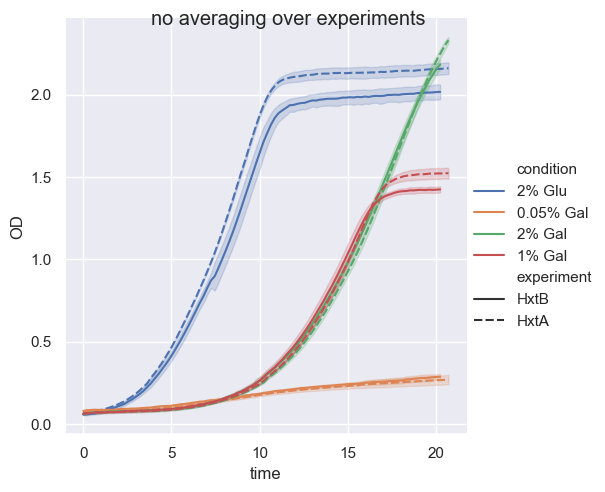

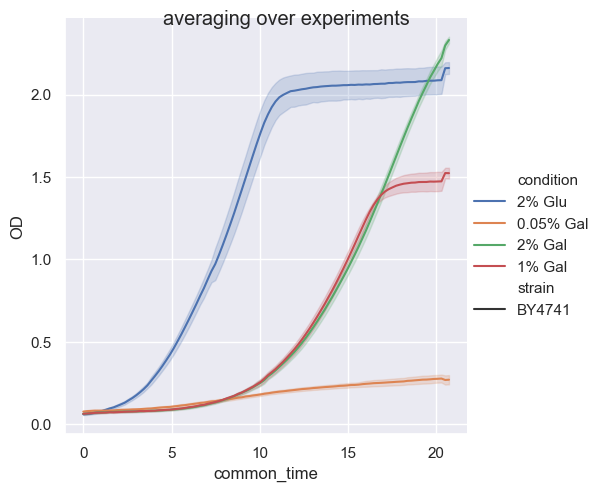

In [49]:
# no averaging over experiments
p.plot(x= 'time', y= 'OD', strains= 'BY4741', hue= 'condition', style= 'experiment', 
       title= 'no averaging over experiments')
# average over experiments
p.plot(x= 'common_time', y= 'OD', strains= 'BY4741', hue= 'condition', style= 'strain',
       title= 'averaging over experiments')

<a id="importingprocesseddataformorethanone"></a>
## Importing processed data for more than one experiment

Exported data for multiple experiments can be simultaneously imported:

In [50]:
p= om.platereader(datadir= 'data')        

Data directory is /Users/pswain/Dropbox/packages/ompkg/data.
Working directory is /Users/pswain/Dropbox/packages/ompkg.
Files available - see .files - are: 
---
{0: 'ExampleData.tsv',
 1: 'ExampleData.xlsx',
 2: 'ExampleDataContents.xlsx',
 3: 'ExampleData_r.tsv',
 4: 'ExampleData_s.tsv',
 5: 'ExampleData_sc.tsv',
 6: 'Glu.xlsx',
 7: 'GluContents.xlsx',
 8: 'GluGal.xlsx',
 9: 'GluGalContents.xlsx',
 10: 'GluGal_r.tsv',
 11: 'GluGal_s.tsv',
 12: 'GluGal_sc.tsv',
 13: 'Glu_r.tsv',
 14: 'Glu_s.tsv',
 15: 'Glu_sc.tsv',
 16: 'HxtA.xlsx',
 17: 'HxtAContents.xlsx',
 18: 'HxtB.xlsx',
 19: 'HxtBContents.xlsx',
 20: 'Sunrise.xlsx',
 21: 'SunriseContents.xlsx'}



In [51]:
p.importdf(['Glu', 'GluGal'])  

Imported Glu_r.tsv
Imported Glu_s.tsv
Imported Glu_sc.tsv

Imported GluGal_r.tsv
Imported GluGal_s.tsv
Imported GluGal_sc.tsv


Experiment: Glu 
---
Conditions:
	 0% Glu
	 0.0625% Glu
	 0.125% Glu
	 0.25% Glu
	 0.5% Glu
	 1% Glu
	 media
Strains:
	 BY4741
	 Null
Data types:
	 OD
Ignored wells:
	 None

Experiment: GluGal 
---
Conditions:
	 0% Gal
	 0% Glu
	 0.0625% Gal
	 0.0625% Glu
	 0.125% Gal
	 0.125% Glu
	 0.2% Gal
	 0.2% Glu
	 0.25% Gal
	 0.25% Glu
	 0.3% Gal
	 0.3% Glu
	 0.35% Gal
	 0.35% Glu
	 0.5% Gal
	 0.5% Glu
	 1% Gal
	 1% Gal-NoSC
	 1% Glu
	 1% Glu-NoSC
	 2% Gal
	 2% Glu
	 media
Strains:
	 BY4741
	 Null
Data types:
	 OD
Ignored wells:
	 None



The dataframe from each experiment is combined into one creating an amalgamated <tt>p.s</tt> and <tt>p.sc</tt> (as well as <tt>p.r</tt>). Data from these dataframes can be plotted as usual: 

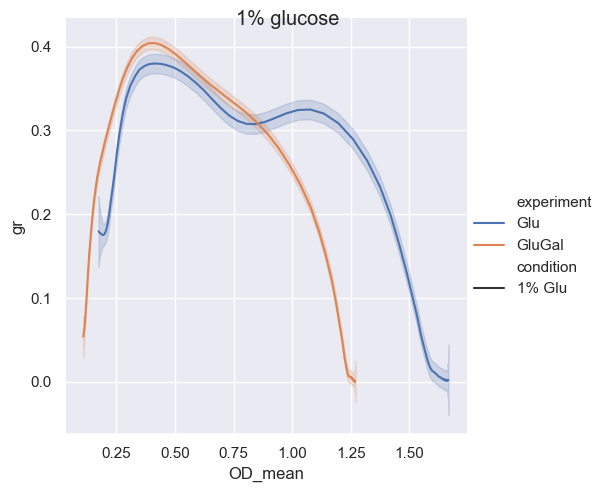

In [52]:
p.plot(x= 'OD_mean', y= 'gr', conditions= '1% Glu', hue= 'experiment', title= '1% glucose')

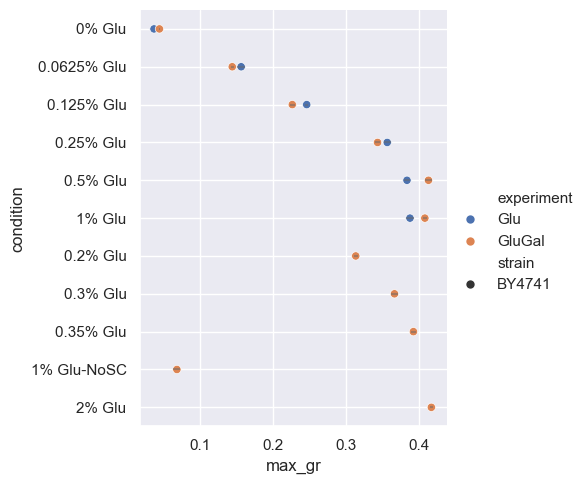

In [53]:
p.plot(x= 'max_gr', y= 'condition', hue= 'experiment', style= 'strain', 
       conditionincludes= 'Glu')

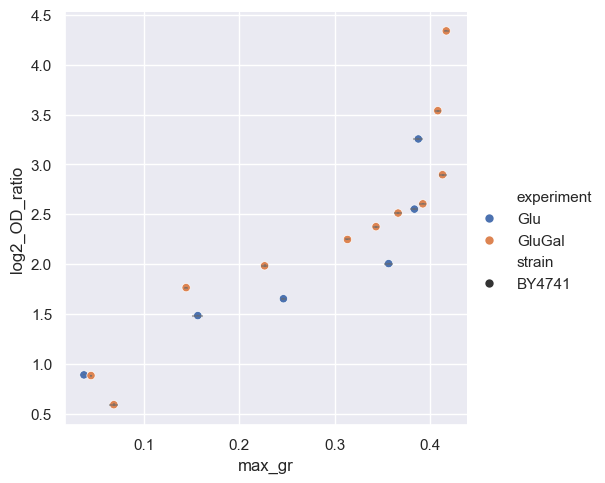

In [54]:
p.plot(x= 'max_gr', y= 'log2_OD_ratio', hue= 'experiment', style= 'strain', 
       conditionincludes= 'Glu') 

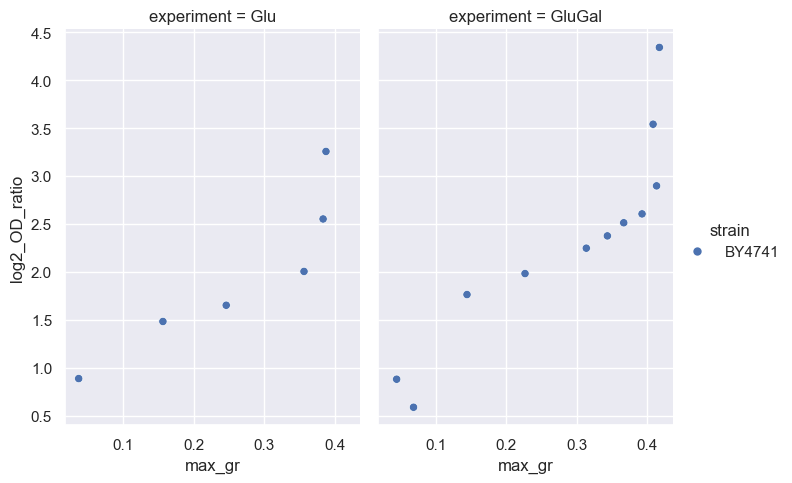

In [55]:
p.plot(x= 'max_gr', y= 'log2_OD_ratio', col= 'experiment', style= 'strain', 
       conditionincludes= 'Glu', aspect= 0.7) 